### Task # 18:
- This is Task # 18 overall, but task 3 of Week 7
### Task # 03:

### Wholesale Customer Dataset

In [67]:
#importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore the specific UserWarning related to KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [68]:
# load dataset
file_path = 'Wholesale_customers_data.csv'
df = pd.read_csv(file_path)

In [69]:
#check for null
df.columns[df.isnull().any()]

Index([], dtype='object')

In [70]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [71]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### 3.1 :

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(scaled_data)

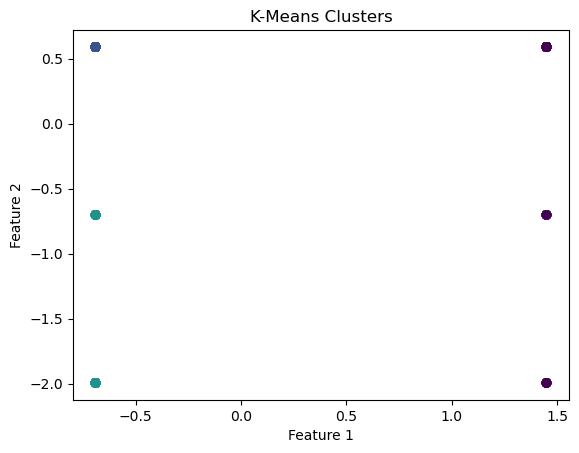

In [74]:
import matplotlib.pyplot as plt

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels)
plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 3.2 :

In [75]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

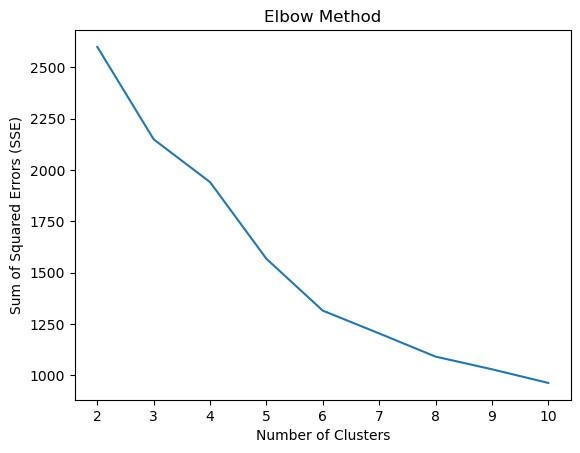

In [76]:
plt.plot(range(2, 11), sse)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

In [77]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans_labels))

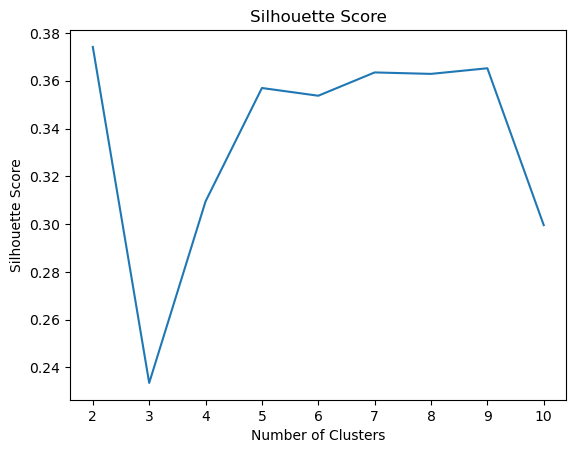

In [78]:
plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### 3.3 :

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering (annual spending in each category)
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[columns]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

In [81]:
# Add the cluster labels to the original dataset
df['Cluster'] = labels

# Calculate the average annual spending in each category for each cluster
cluster_avg_spending = df.groupby('Cluster')[columns].mean()

In [82]:
# Print the cluster characteristics
print("Cluster Characteristics:")
print(cluster_avg_spending)

Cluster Characteristics:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5509.250000  10555.635417  16477.927083   1420.125000   
1        34188.627119   4850.576271   5870.000000   7215.559322   
2        16911.090909  34864.363636  46126.181818   3245.454545   
3         9112.235294   2965.404412   3783.702206   2413.591912   
4        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             7199.406250   1658.791667  
1              955.847458   2491.796610  
2            23008.090909   4177.363636  
3              976.908088    974.926471  
4              755.500000  26776.000000  


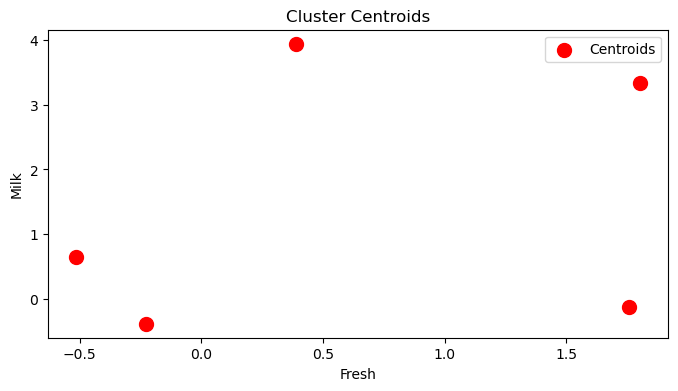

In [83]:
# Plot the cluster centroids
plt.figure(figsize=(8, 4))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Cluster Centroids')
plt.legend()
plt.show()

In [84]:
# Analyze the clusters
print("\nCluster Analysis:")
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"  Average annual spending: {cluster_avg_spending.iloc[i]}")
    print(f"  Number of customers: {len(cluster_data)}")
    print(f"  Characteristics: {cluster_data.describe().loc['mean']}")
    print()


Cluster Analysis:
Cluster 0:
  Average annual spending: Fresh                5509.250000
Milk                10555.635417
Grocery             16477.927083
Frozen               1420.125000
Detergents_Paper     7199.406250
Delicassen           1658.791667
Name: 0, dtype: float64
  Number of customers: 96
  Characteristics: Channel                 1.906250
Region                  2.520833
Fresh                5509.250000
Milk                10555.635417
Grocery             16477.927083
Frozen               1420.125000
Detergents_Paper     7199.406250
Delicassen           1658.791667
Cluster                 0.000000
Name: mean, dtype: float64

Cluster 1:
  Average annual spending: Fresh               34188.627119
Milk                 4850.576271
Grocery              5870.000000
Frozen               7215.559322
Detergents_Paper      955.847458
Delicassen           2491.796610
Name: 1, dtype: float64
  Number of customers: 59
  Characteristics: Channel                 1.135593
Region       

### 3.4 :

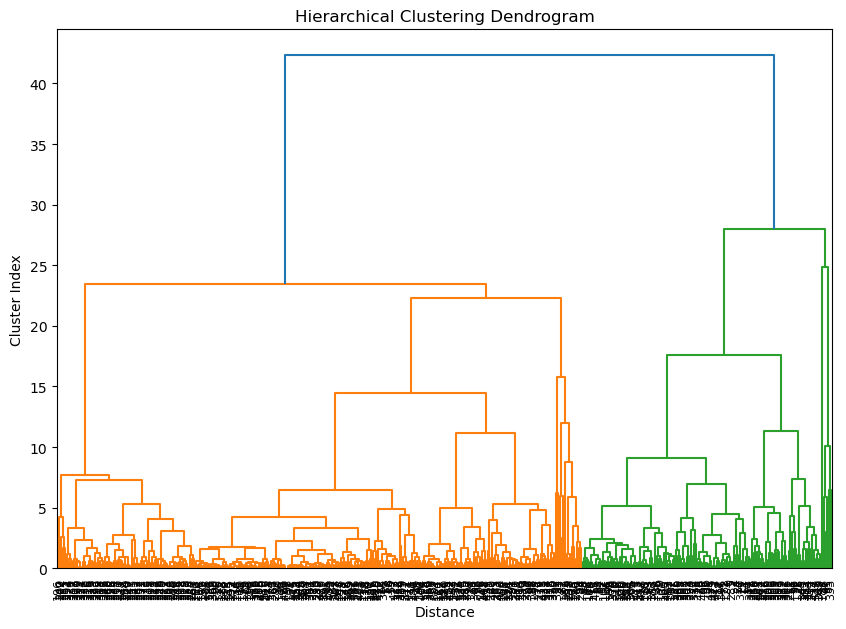

In [85]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering
Z = linkage(scaled_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.xlabel("Distance")
plt.ylabel("Cluster Index")
plt.show()

### 3.5 :

In [86]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler


# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
hclust_labels = hclust.fit_predict(X_scaled)

In [87]:
# Evaluate clustering results
print("Clustering Results Comparison:")
print("================================")

# K-Means Clustering
print("K-Means Clustering:")
print(f"  Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_score(X_scaled, kmeans_labels):.3f}")
print()

# Hierarchical Clustering
print("Hierarchical Clustering:")
print(f"  Silhouette Score: {silhouette_score(X_scaled, hclust_labels):.3f}")
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, hclust_labels):.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_score(X_scaled, hclust_labels):.3f}")
print()

Clustering Results Comparison:
K-Means Clustering:
  Silhouette Score: 0.369
  Calinski-Harabasz Score: 159.504
  Davies-Bouldin Index: 1.029

Hierarchical Clustering:
  Silhouette Score: 0.240
  Calinski-Harabasz Score: 128.645
  Davies-Bouldin Index: 0.973



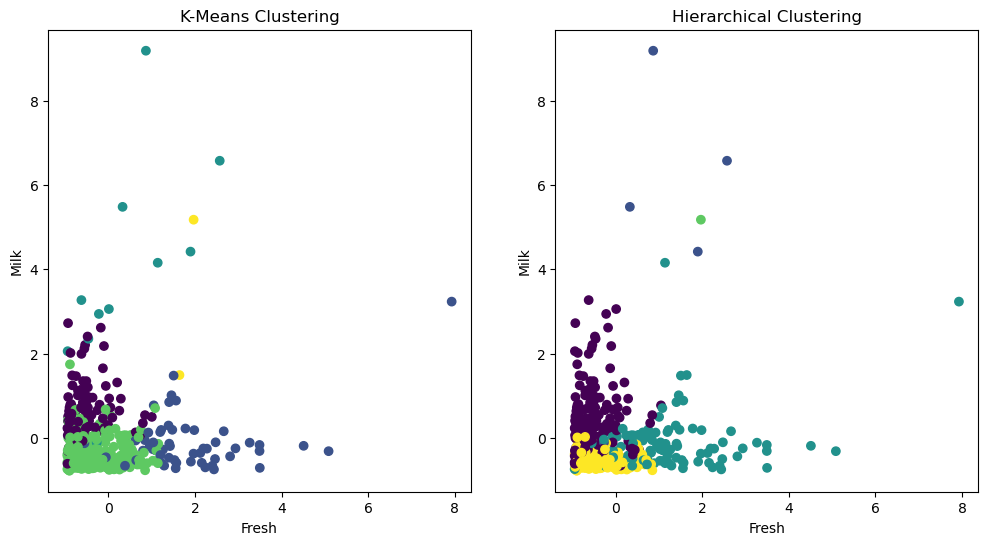

In [88]:
# Visualize the clustering results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering")
plt.xlabel("Fresh")
plt.ylabel("Milk")

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hclust_labels)
plt.title("Hierarchical Clustering")
plt.xlabel("Fresh")
plt.ylabel("Milk")

plt.show()